# Visualizing the Spread of Drought Across the U.S.

If you don't have **geopandas** and **matplotlib** installed, uncomment out this cell and install them for the notebook to work. I'd suggest you use [miniconda](https://docs.conda.io/en/latest/miniconda.html) or [anaconda](https://docs.anaconda.com/anaconda/navigator/index.html) and create a seperate environment for geopandas to work. If you're running this script on google colab you can simply use pip.

In [1]:
# !pip install geopandas
# !pip install shapely

Besides using [`geopandas`](https://geopandas.org/en/stable/) and [`matplotlib`](https://matplotlib.org/) I'll also be using [`os`](https://docs.python.org/3/library/os.html) for navigating and storing data in my operating system and [`gc`](https://docs.python.org/3/library/gc.html)(Python's built in garbage collector library) to make sure that it collects any unused memory for better performance.

In [2]:
import gc
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
drought_data = gpd.read_file('./Cleaned/USDM_2020.shp')

In [4]:
drought_data.head()

,DM,Shape_Leng,Shape_Area,layer,date,geometry
0,0,5.290406e+07,1.090511e+12,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((3035637.551 -2054754.639, 3035..."
1,1,2.251269e+07,6.363360e+11,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((3159349.973 -1982198.834, 3160..."
2,2,8.760369e+06,2.426855e+11,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((-270198.291 -1497286.046, -264..."
3,3,6.979721e+05,9.226889e+09,USDM_20200107,"07 January, 2020","MULTIPOLYGON (((-383208.046 -1211056.297, -368..."
4,4,2.864648e+04,3.624351e+07,USDM_20200107,"07 January, 2020","POLYGON ((-5860708.526 -292051.252, -5860509.7..."


In [5]:
drought_data.set_index('date', inplace=True)

In [6]:
usa_shape = gpd.read_file('USA Boundary/State Boundary.shp')

In [7]:
usa_shape.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,244,USA,United States,1,Alabama,State,State,None,AL|Ala.,"MULTIPOLYGON (((728156.571 -1112311.544, 72818..."
1,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-4841743.056 3592198.677, -484..."
2,244,USA,United States,2,Alaska,State,State,None,AK|Alaska,"MULTIPOLYGON (((-2430580.604 2928371.957, -243..."
3,244,USA,United States,3,Arizona,State,State,None,AZ|Ariz.,"POLYGON ((-1217964.502 -259104.549, -1213033.8..."
4,244,USA,United States,4,Arkansas,State,State,None,AR|Ark.,"POLYGON ((222888.932 -409158.855, 223204.302 -..."


I'm not a huge fan of matplotlib's default styles so I'll be defining my own styes with [rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html#customizing-with-dynamic-rc-settings)

In [8]:
plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['figure.dpi'] = 300

(-3000000.0, 3000000.0, -3000000.0, 3000000.0)

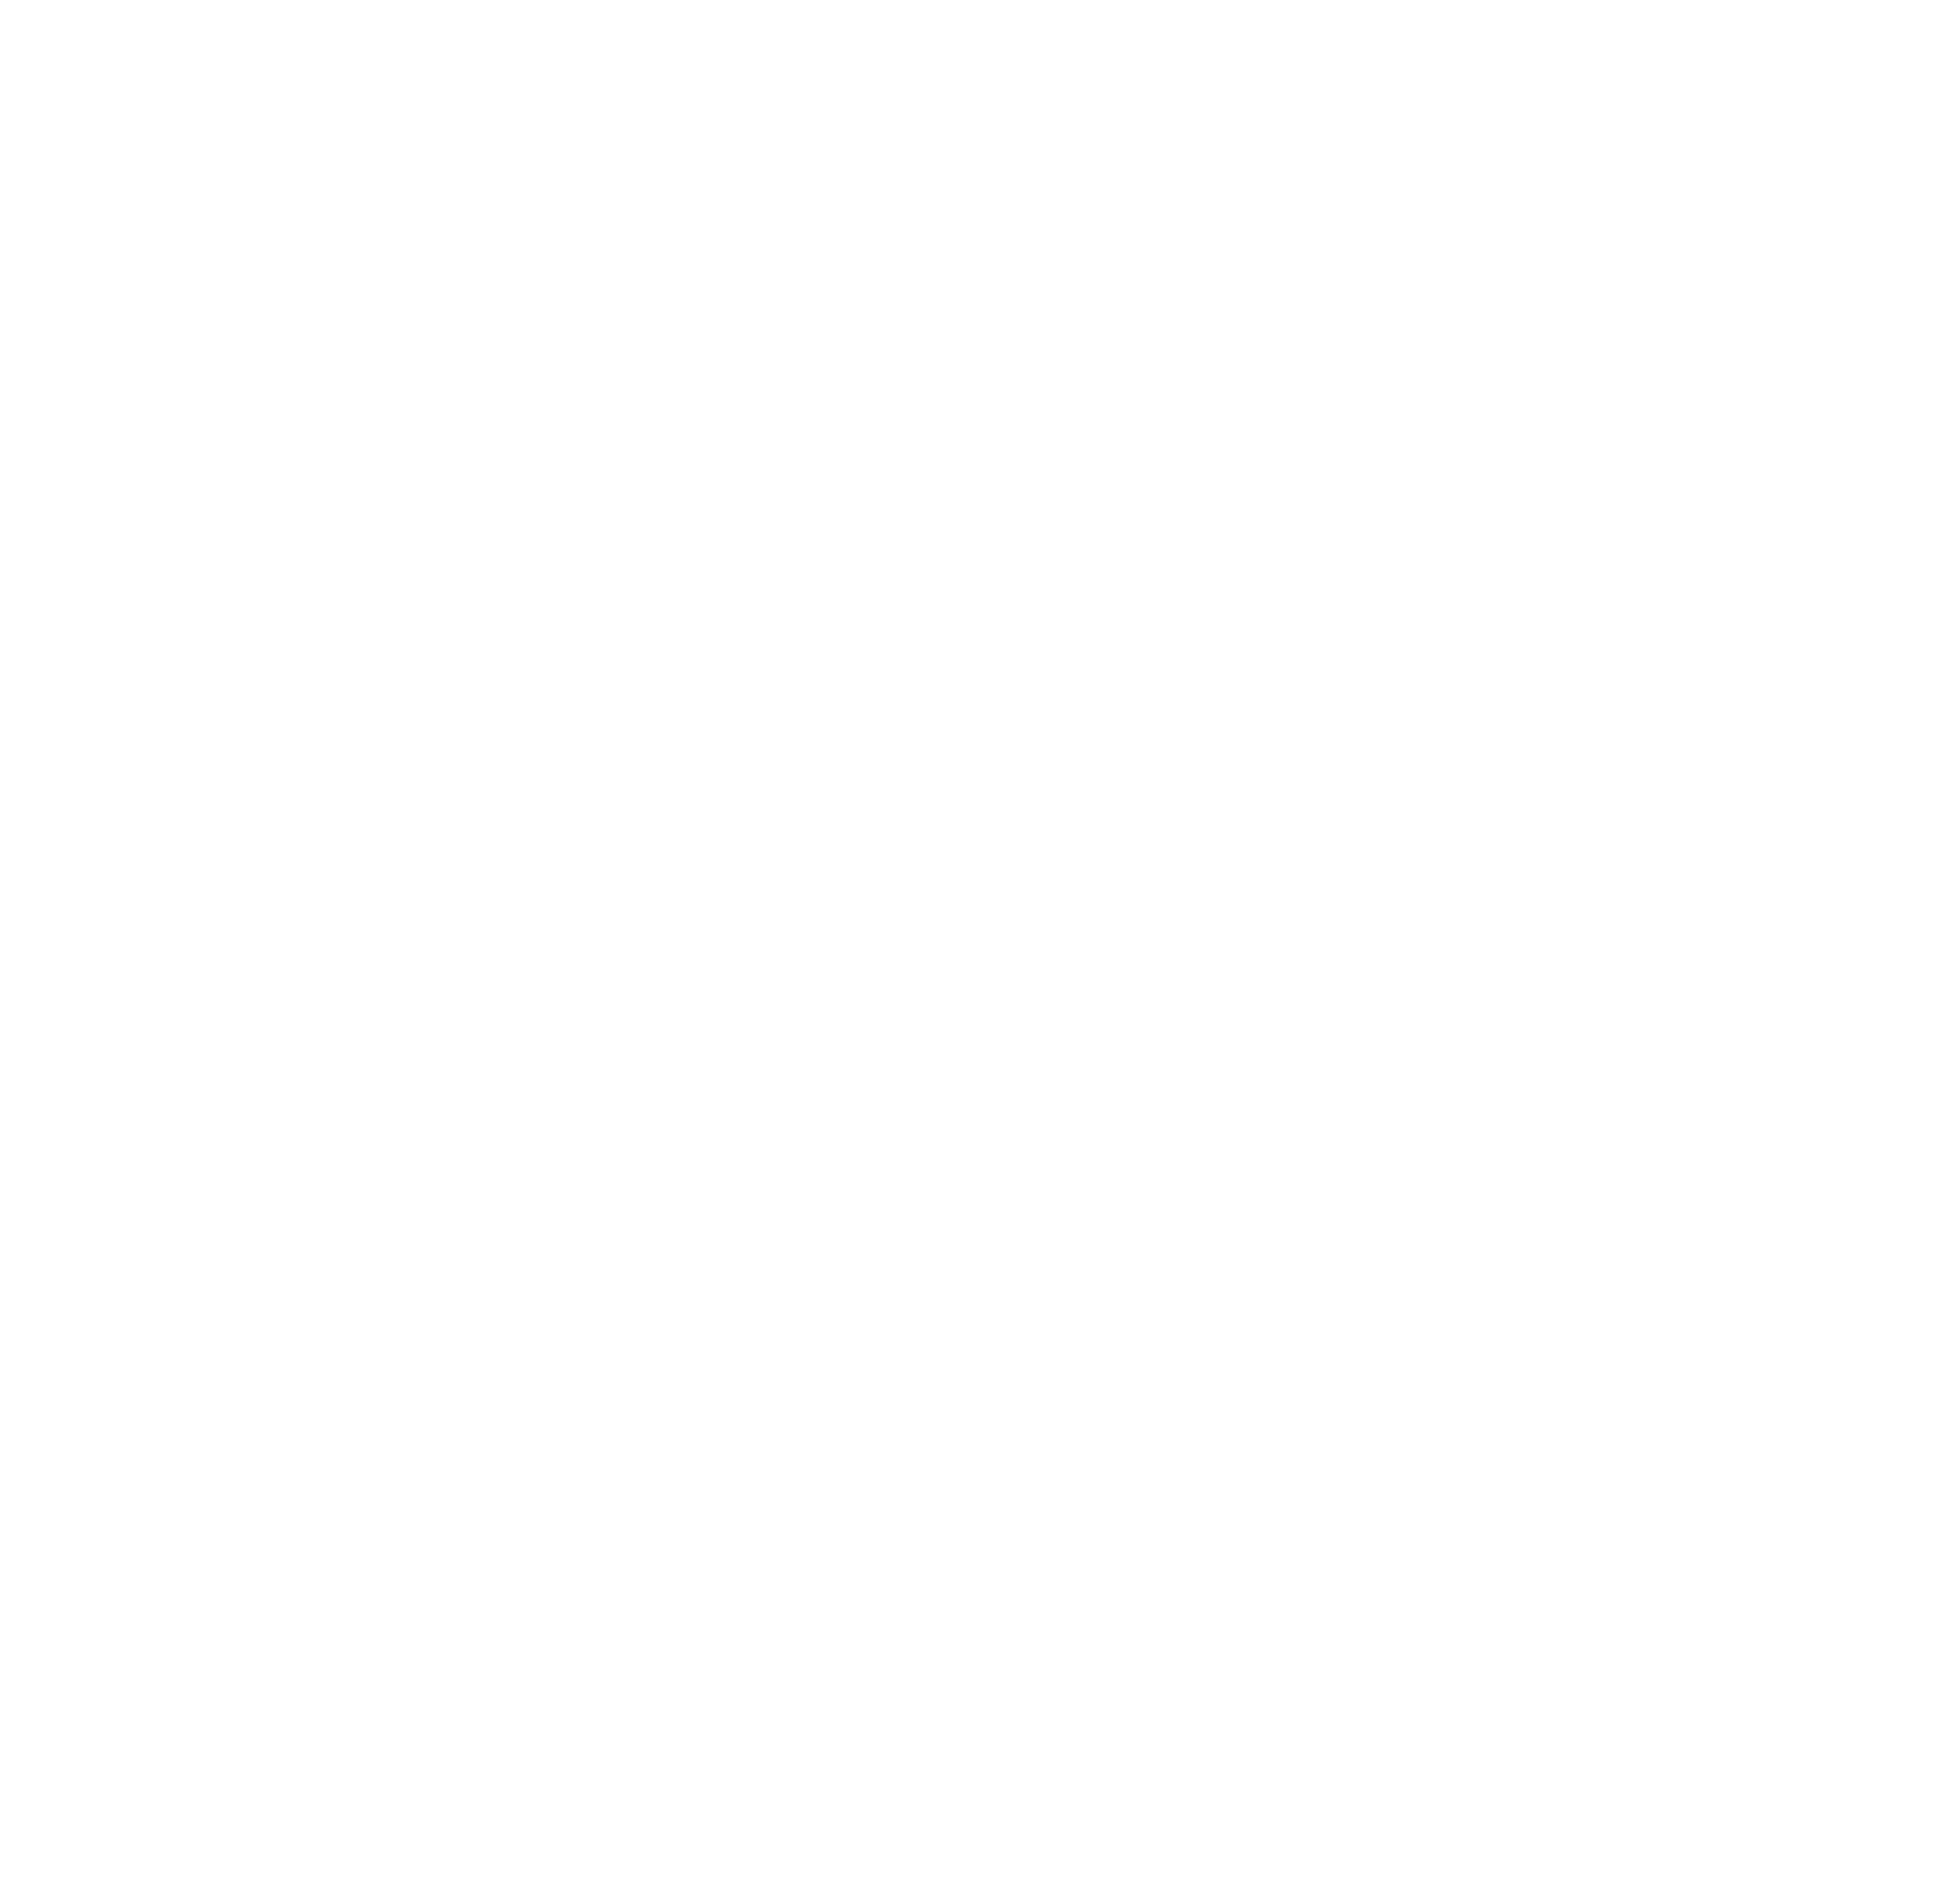

In [9]:
fig, ax = plt.subplots(figsize=(30, 30))
# I won't be visualizing Alaska here so I'll be limiting the plot to US Map only
ax.set_xlim(-3e6, 3e6)
ax.set_ylim(-3e6, 3e6)
ax.axis('off')

The colormap available in matplotlib is kinda cool I guess but I'd like to define my own color map with [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) that looks like [Mike Bostock's](https://www.nytimes.com/interactive/2014/upshot/mapping-the-spread-of-drought-across-the-us.html) map.

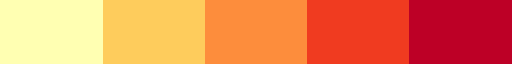

In [10]:
colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
my_cmap = ListedColormap(colors, 'my_colors')
my_cmap

Now let's plot the data

In [11]:
usa_shape.plot(ax=ax, facecolor='#e7e7e7', edgecolor='none')
drought_data.plot(ax=ax, column='DM', cmap = my_cmap)
usa_shape.plot(ax=ax,facecolor="none", edgecolor="white")

<AxesSubplot:>

<Figure size 9000x9000 with 0 Axes>

I'll be using [Garamond](https://fonts.google.com/specimen/EB+Garamond) as font for the title. If you don't have it installed in your pc it might throw an error, or you can just change `family='Garamond'` to the name of the font you like.

Alternatively you can use [`matplotlib.font_manager`](https://matplotlib.org/stable/api/font_manager_api.html) to define your own style.

In [12]:
fig.suptitle('07 January, 2020', y=.7, family='Garamond', size=25)

Text(0.5, 0.7, '07 January, 2020')

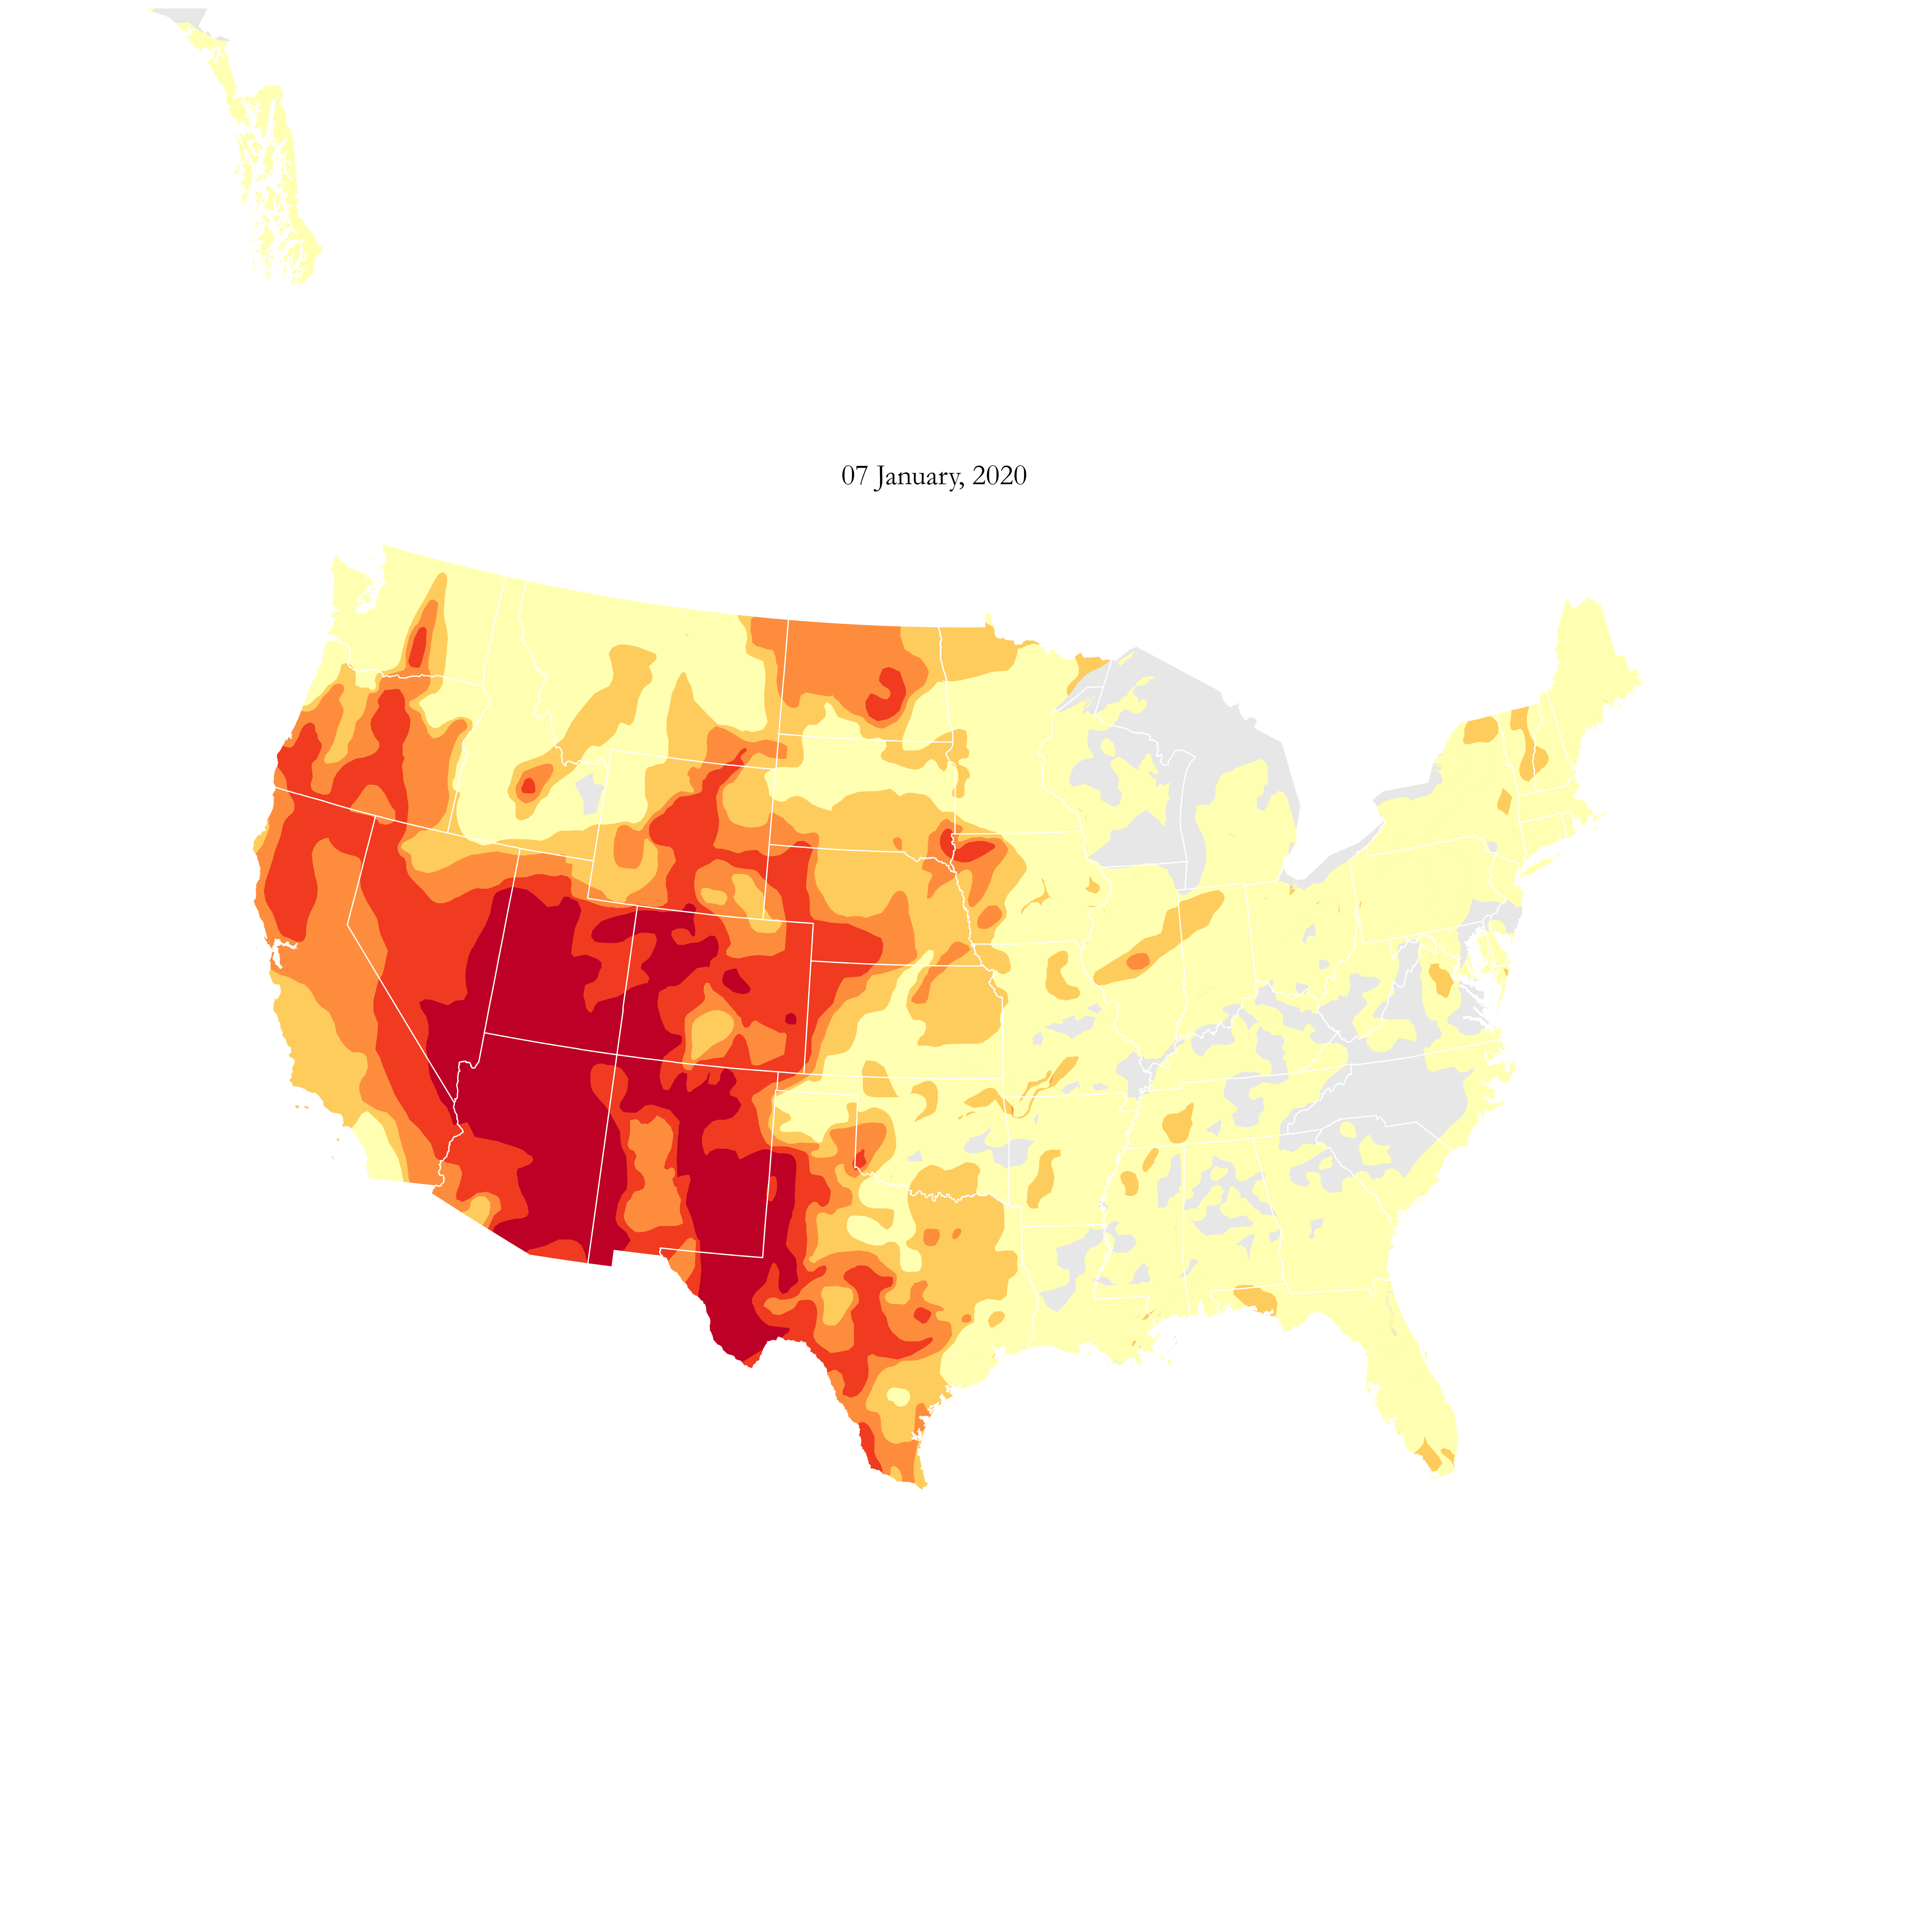

In [13]:
fig

And *voila!* We got ourselves a Drought Map for the year 2020. However, I'd like to visualize the map for each week of 2020 not the whole year. Therefore, I'll be defining a function that groups the drought data by date and run a for loop to plot each week of 2020.

# Defining a function for resuability

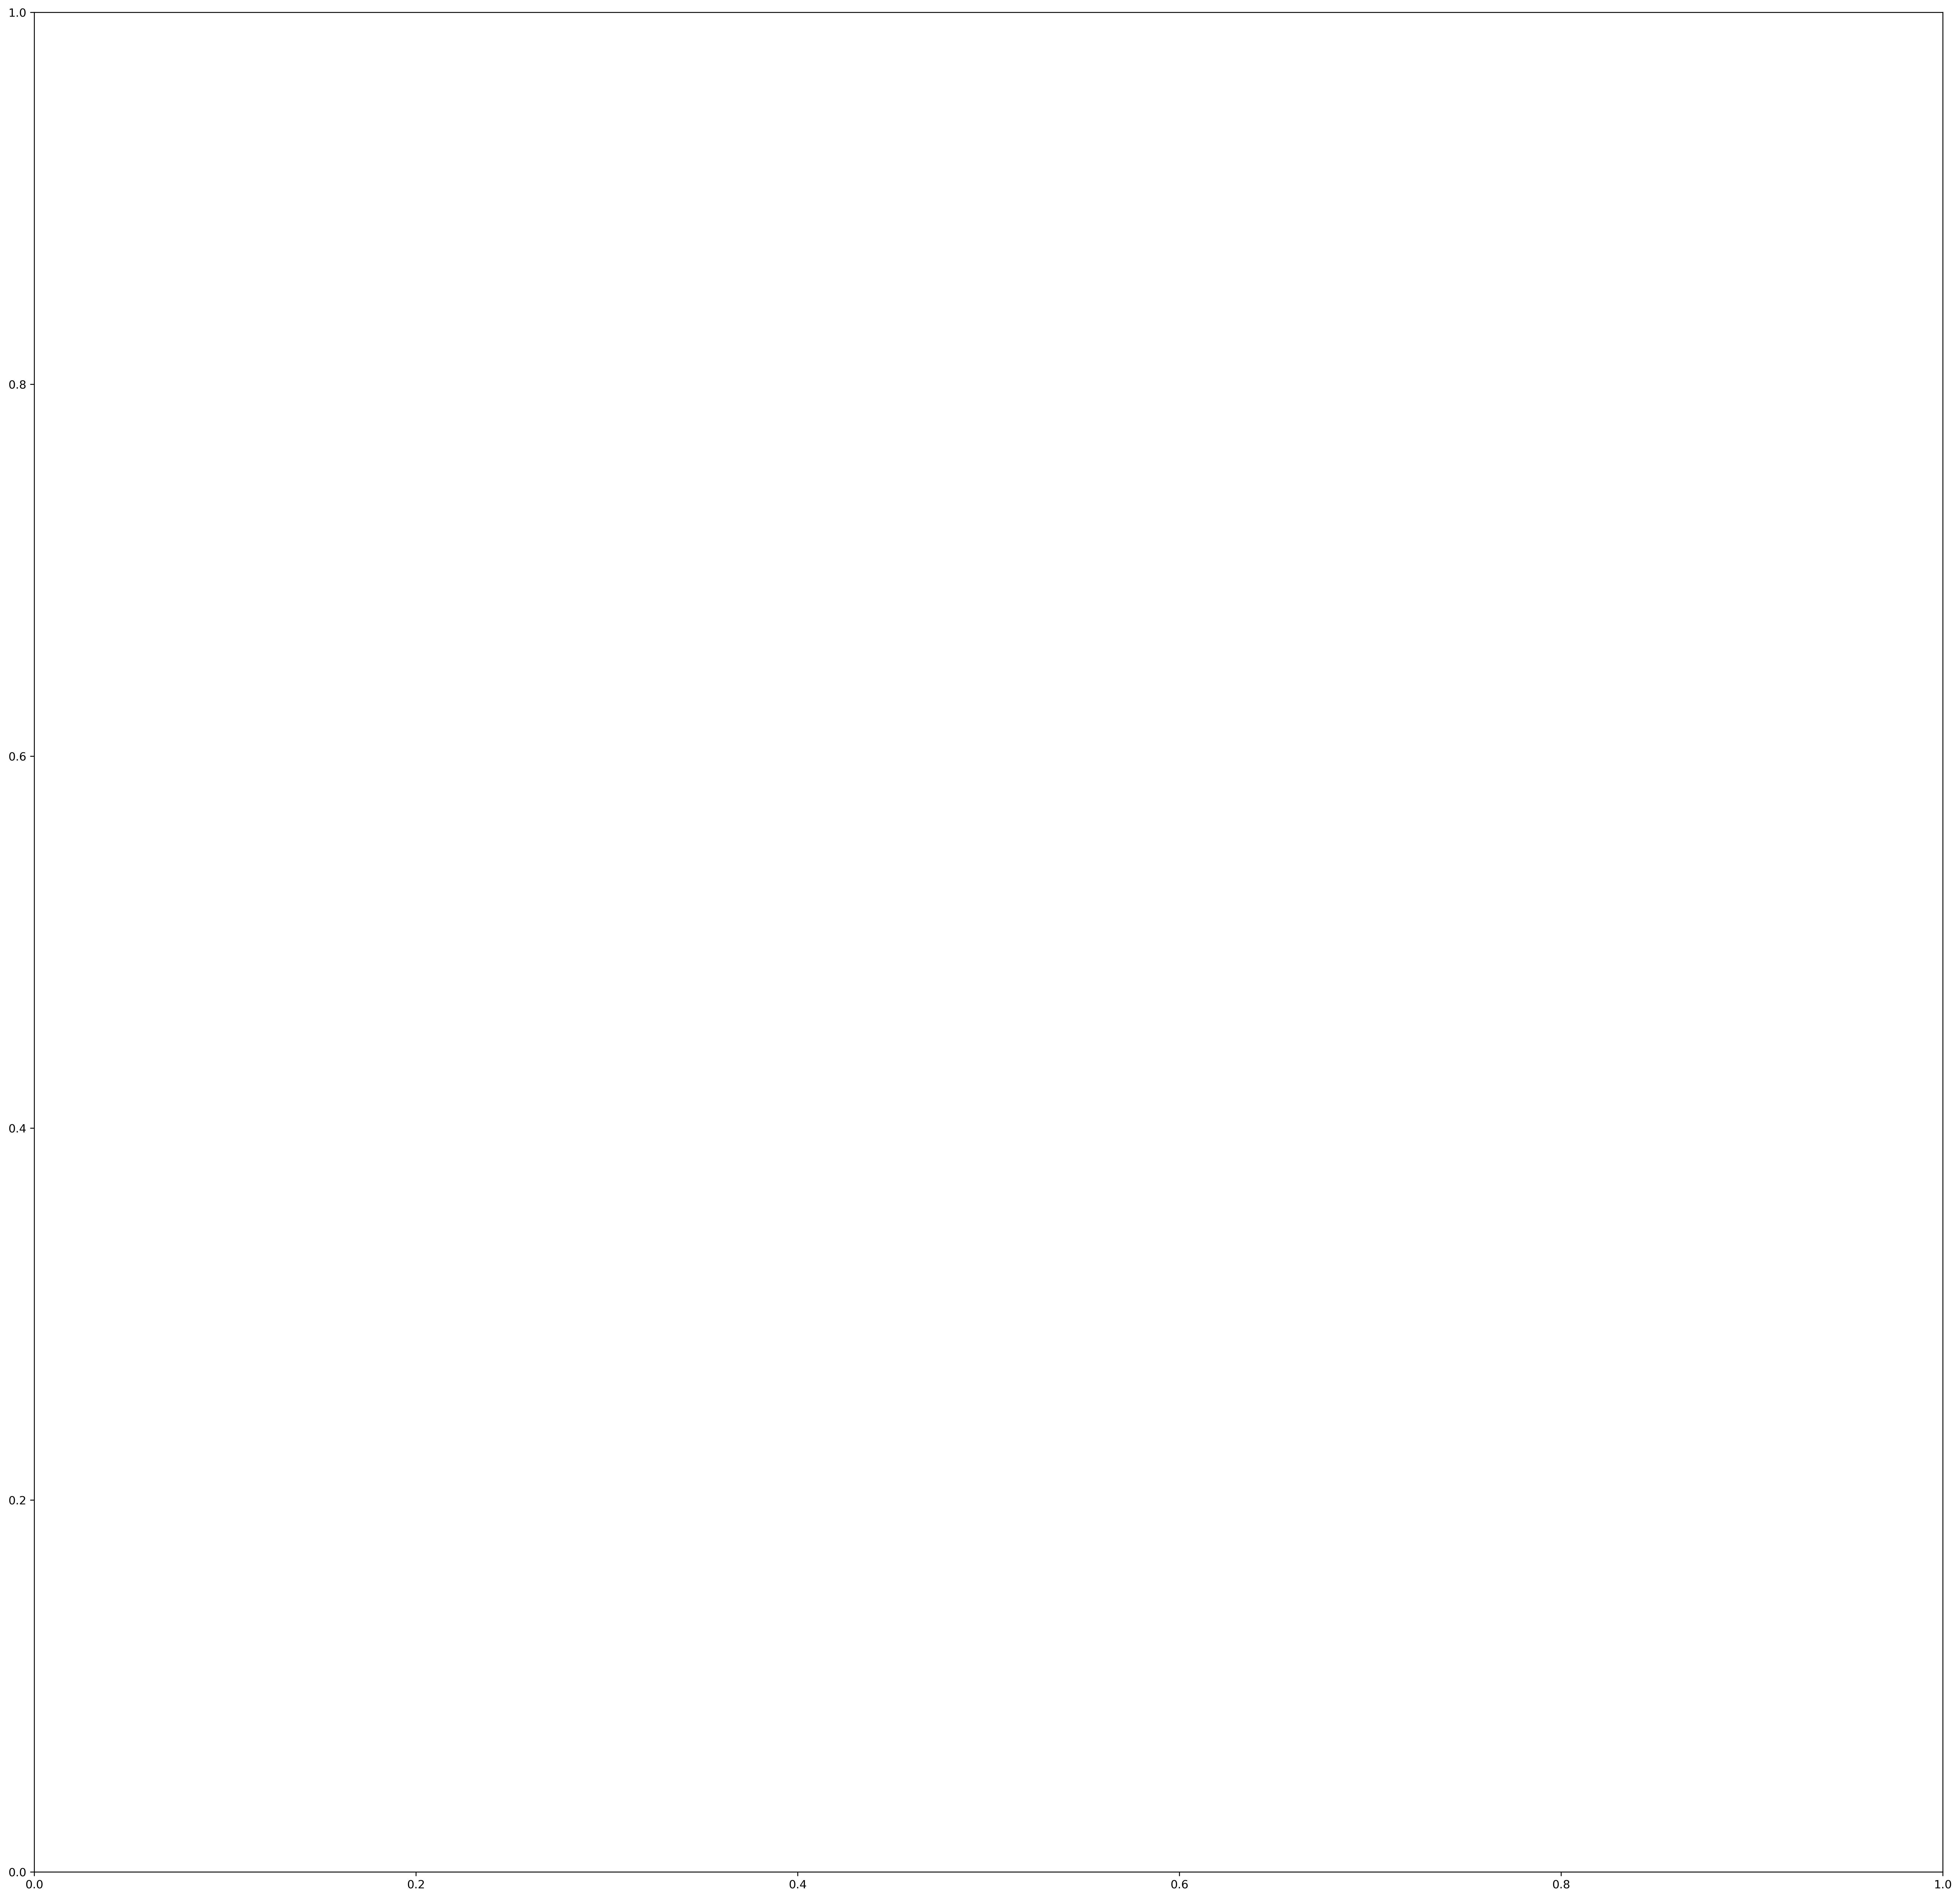

In [14]:
plt.rcParams['figure.figsize'] = 30, 30
plt.rcParams['figure.dpi'] = 300


usa_shape = gpd.read_file('USA Boundary/State Boundary.shp')
drought_data = gpd.read_file('./Cleaned/USDM_2020.shp')

drought_data.set_index('date', inplace=True)
date_groups = drought_data.groupby('date')

colors = ['#ffffb2', '#fecc5c', '#fd8d3c', '#f03b20', '#bd0026']
my_cmap = ListedColormap(colors, 'my_colors')

fig, ax = plt.subplots(figsize=(30, 30))

def drought_map(basemap, drought_data, date):
    ax.cla()
    ax.set_xlim(-3e6, 3e6)
    ax.set_ylim(-3e6, 3e6)
    ax.axis('off')
    usa_shape.plot(ax=ax, facecolor='#e7e7e7', edgecolor='none')
    date_groups.get_group(date).plot(ax=ax, column='DM', cmap = my_cmap)
    usa_shape.plot(ax=ax,facecolor="none", edgecolor="white")
    fig.suptitle(date, y=.7, family='Garamond', size=25)
    return fig.savefig(f"{date}.jpg")

In [15]:
all_dates = drought_data.index.unique()
all_dates

Index(['07 January, 2020', '14 January, 2020', '21 January, 2020',
       '28 January, 2020', '04 February, 2020', '11 February, 2020',
       '18 February, 2020', '25 February, 2020', '03 March, 2020',
       '10 March, 2020', '17 March, 2020', '24 March, 2020', '31 March, 2020',
       '07 April, 2020', '14 April, 2020', '21 April, 2020', '28 April, 2020',
       '05 May, 2020', '12 May, 2020', '19 May, 2020', '26 May, 2020',
       '02 June, 2020', '09 June, 2020', '16 June, 2020', '23 June, 2020',
       '30 June, 2020', '07 July, 2020', '14 July, 2020', '21 July, 2020',
       '28 July, 2020', '04 August, 2020', '11 August, 2020',
       '18 August, 2020', '25 August, 2020', '01 September, 2020',
       '08 September, 2020', '15 September, 2020', '22 September, 2020',
       '29 September, 2020', '06 October, 2020', '13 October, 2020',
       '20 October, 2020', '27 October, 2020', '03 November, 2020',
       '10 November, 2020', '17 November, 2020', '24 November, 2020',
       '0

In [16]:
os.chdir('./Plots')
os.getcwd()

'D:\\My Codes\\Drought-Monitor\\Plots'

Now I'll be looping over each week and save the plots in Plots folder

In [17]:
for date in all_dates:
  drought_map(usa_shape, drought_data, date)
  gc.collect()

<Figure size 9000x9000 with 0 Axes>

Later I combined all the output files with the Pillow library and set a title and a legend to visualize the output.  
![Drought Severity in USA](https://raw.githubusercontent.com/rezw4n/Drought-Monitor/master/Plots/USDM.gif)